## Analyzing Afrobeats Data on Spotify

In [4]:
# Import necessary libraries
import base64
from requests import post, get
import json
import pandas as pd 

In [6]:
# --- Credentials ---
# Hardcoded for easy use in a notebook environment.
# For shared or production code, it's better to use environment variables.
# Get client ID and client secret from environment variables
client_id = "665b8ab446d445a2bcc209275a866097"
client_secret = "61febef2089746489bf27f31cc2182f7"


# --- Function Definitions ---
def get_token():
    """Authenticates with the Spotify API to get an access token."""
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token


def get_auth_header(token):
    """Constructs the authorization header for API requests."""
    return {"Authorization": "Bearer " + token}


def search_for_artist(token, artist_name):
    """Searches for an artist on Spotify by name."""
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = f"?q={artist_name}&type=artist&limit=1"

    query_url = url + query
    result = get(query_url, headers=headers)
    json_result = json.loads(result.content)["artists"]["items"]

    if len(json_result) == 0:
        print("No artist with this name exists...")
        return None

    return json_result[0]


def get_artist_albums(token, artist_id):
    """Fetches all albums, singles, and EPs for a specific artist."""
    url = f"https://api.spotify.com/v1/artists/{artist_id}/albums"
    headers = get_auth_header(token)
    params = {
        "include_groups": "album,single",
        "limit": 50
    }

    result = get(url, headers=headers, params=params)
    json_result = json.loads(result.content)["items"]
    return json_result


# --- Main Execution Block (Corrected for Jupyter) ---
# The code is now un-indented and will run directly when you execute the cell.

# 1. Get the authentication token
token = get_token()

# 2. Choose an artist to search for
artist_name_to_search = "Olamide"
search_result = search_for_artist(token, artist_name_to_search)

if search_result:
    artist_name = search_result["name"]
    artist_id = search_result["id"]

    # 3. Fetch the artist's discography
    albums_json = get_artist_albums(token, artist_id)

    if albums_json:
        # 4. Process the JSON data and prepare it for the DataFrame
        album_list = []
        for album in albums_json:
            album_data = {
                "Name": album["name"],
                "Type": album["album_type"].capitalize(),
                "Release Date": album["release_date"],
                "Total Tracks": album["total_tracks"]
            }
            album_list.append(album_data)

        # 5. Create a pandas DataFrame from the list of album data
        df = pd.DataFrame(album_list)

        # To avoid duplicates from different markets, drop them based on Name and Type
        df.drop_duplicates(subset=['Name', 'Type'], inplace=True)

        # Sort the DataFrame by release date, newest first
        df.sort_values(by="Release Date", ascending=False, inplace=True)

        # Reset the index to be a clean 1, 2, 3...
        df.reset_index(drop=True, inplace=True)
        df.index += 1

        # 6. Display the DataFrame
        print(f"\n--- Discography for {artist_name} ---")
        display(df)  # Use display() in Jupyter for a nicer table output


--- Discography for Olamide ---


,Name,Type,Release Date,Total Tracks
1,Olamidé,Album,2025-06-18,17
2,99 (feat. Daecolm),Single,2025-06-09,1
3,Kai!,Single,2025-04-28,1
4,Love in Tokyo,Single,2025-01-24,1
5,Idan Buruku (Freestyle),Single,2025-01-18,1
6,Share Update (2024 Remastered Remix),Single,2024-11-29,1
7,Hello Habibi,Single,2024-11-07,1
8,Order,Single,2024-11-01,1
9,"Ikigai / 生き甲斐, Vol. 1",Album,2024-06-26,7
10,WAHALA (FEAT. OLAMIDE),Single,2024-04-19,1


In [16]:
olamide_albums = df[df['Type'] == 'Album']

In [22]:
olamide_albums.sort_values(
    by='Total Tracks',
    ascending=False
).reset_index(drop=True).style.background_gradient(cmap='Greens')

,Name,Type,Release Date,Total Tracks
0,Street OT,Album,2016-12-01,22
1,Eyan Mayweather,Album,2016-12-01,21
2,Baddest Guy Ever Liveth,Album,2013-11-07,21
3,YBNL,Album,2016-12-01,20
4,Olamidé,Album,2025-06-18,17
5,Lagos Nawa!,Album,2017-11-17,17
6,The Glory,Album,2016-12-26,16
7,Rapsodi,Album,2011-03-21,16
8,Unruly,Album,2023-08-08,15
9,Carpe Diem,Album,2020-10-07,12


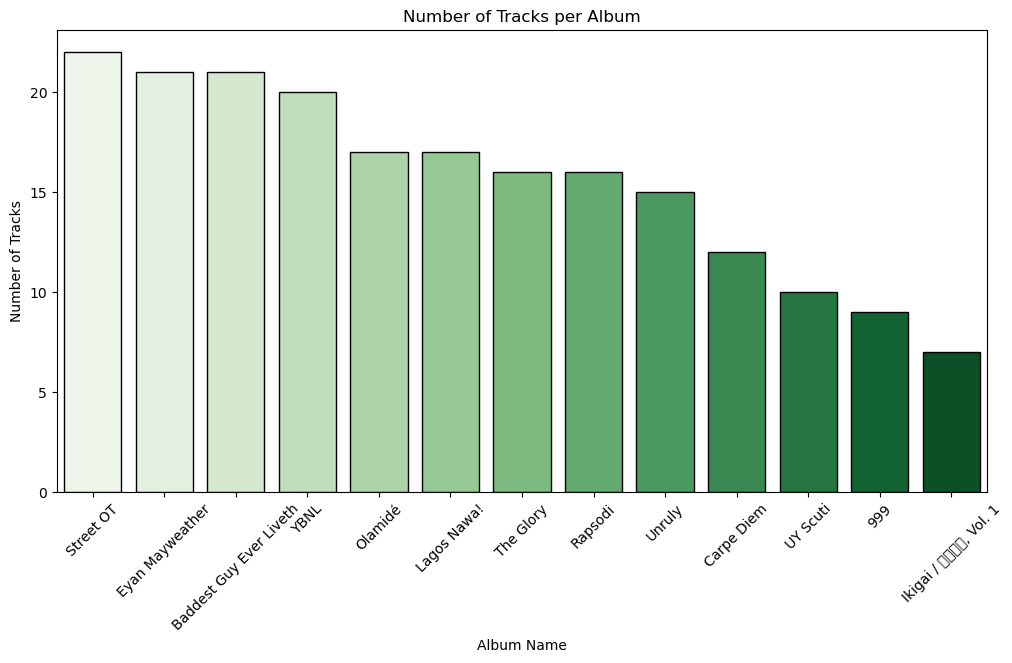

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=olamide_albums.sort_values(
        by='Total Tracks',
        ascending=False
    ).reset_index(drop=True),
    x='Name',
    y='Total Tracks',
    palette='Greens',
    orient='v',
    edgecolor='black'
)

plt.title('Number of Tracks per Album')
plt.xlabel('Album Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

In [30]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
pio.renderers.default = "iframe_connected"

px.bar(
    data_frame=olamide_albums.sort_values(
        by='Total Tracks',
        ascending=False
    ).reset_index(drop=True),
    x='Name',
    y='Total Tracks',
    title='Number of Tracks per Album',
    template='plotly_dark',
    color_discrete_sequence=['#1DB954']
)